# House Price Prediction

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(1460, 81)

In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
459,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,173000
988,989,60,RL,NaN,12046,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,298.0,TA,TA,CBlock,TA,TA,No,LwQ,156,Unf,0,692,848,GasA,TA,Y,SBrkr,1118,912,0,2030,0,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1976.0,Fin,2,551,TA,TA,Y,0,224,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,195000
975,976,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,641,Unf,0,32,673,GasA,Ex,Y,SBrkr,673,709,0,1382,1,0,2,1,3,1,Gd,6,Typ,0,NaN,Detchd,2000.0,Unf,2,490,TA,TA,Y,153,50,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,165000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
1019,1020,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,145.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,16,Unf,0,1346,1362,GasA,Ex,Y,SBrkr,1506,0,0,1506,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,440,TA,TA,Y,142,20,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,213490
1227,1228,20,RL,72.0,8872,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,8,1965,2008,Gable,CompShg,VinylSd,VinylSd,BrkFace,300.0,TA,TA,CBlock,TA,TA,No,ALQ,595,Unf,0,317,912,GasA,Ex,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1992.0,Unf,2,576,TA,TA,Y,0,240,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,147000
1118,1119,80,RL,85.0,13825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1958,1987,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,533,533,GasA,TA,Y,SBrkr,1021,580,0,1601,0,1,1,0,3,1,TA,6,Min2,0,NaN,BuiltIn,1958.0,RFn,1,300,TA,TA,Y,280,34,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,140000
1013,1014,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,4,1910,2006,Hip,CompShg,MetalSd,Stucco,NaN,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,247,Rec,465,310,1022,GasW,TA,N,SBrkr,1022,0,0,1022,1,0,1,0,2,1,TA,4,Maj2,0,NaN,Detchd,1956.0,Unf,1,280,TA,TA,Y,0,30,226,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,85000
929,930,60,RL,NaN,13006,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1997,1997,Gable,CompShg,HdBoard,HdBoard,BrkFace,285.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,9

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### we can't see the all the columns 

### so i using the transposing to see all the columns description

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### In this data we have missing values 

#### Find the duplicates 

In [10]:
df.duplicated().sum()

0

#### There is no duplicated values in the data 

### **Handling the missing values**

In [11]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [12]:
# Fill 'None' where missing means "No feature"
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in none_cols:
    df[col] = df[col].fillna('None')

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### **Fill the numeric values**

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [15]:
df.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [16]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [17]:
df.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [18]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [21]:
df.describe(include='O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,None,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [22]:
df = df.drop(columns=['Id','Alley'])

In [23]:
df.MSZoning.value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [24]:
df.Street .value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [25]:
df.LotShape.value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [26]:
df.LandContour.value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [27]:
df.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [28]:
df.LotConfig.value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [29]:
df.LandSlope.value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [30]:
df.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [31]:
df.Condition2.value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [32]:
df.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [33]:
df.BldgType.value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [34]:
df.HouseStyle.value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [35]:
df.OverallQual.value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [36]:
df.OverallCond.value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [37]:
df.YearBuilt.value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3


In [38]:
cat_cols = df.select_dtypes(include=['object']).columns

### Handling the outliers

In [39]:
# 1. Select numeric columns only
num_cols = df.select_dtypes(include=['number']).columns

# 2. Calculate IQR, lower, and upper bounds
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [40]:
# 3. Count outliers before fixing
outliers = ((df[num_cols] < lower) | (df[num_cols] > upper)).sum()
print(outliers)

MSSubClass       103
LotFrontage       93
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        98
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt       81
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64


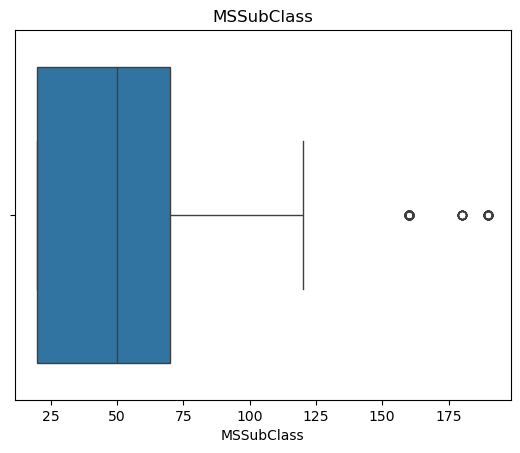

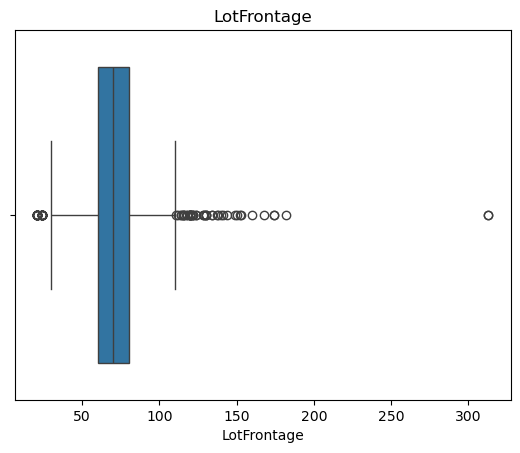

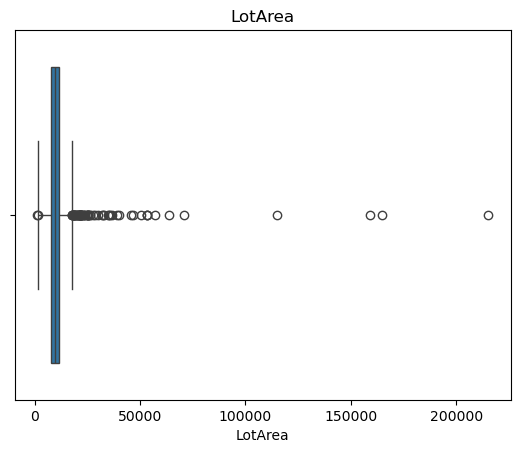

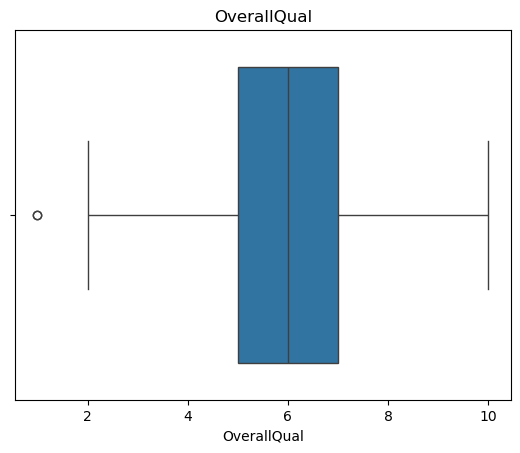

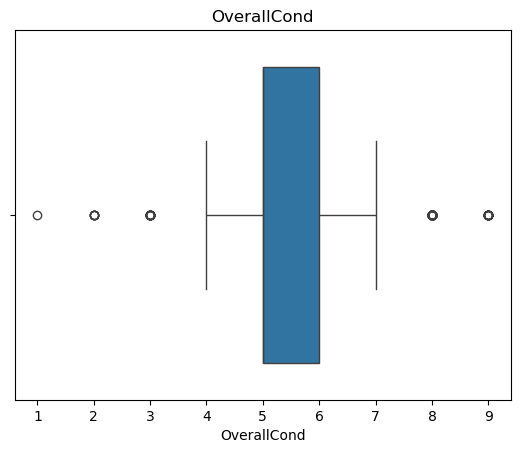

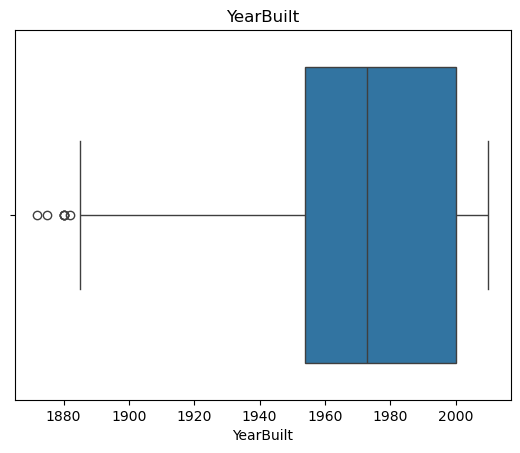

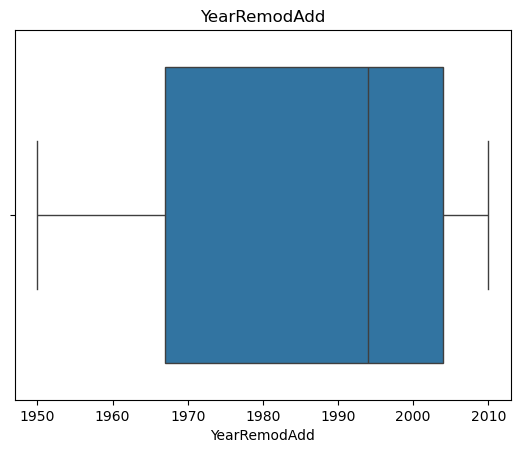

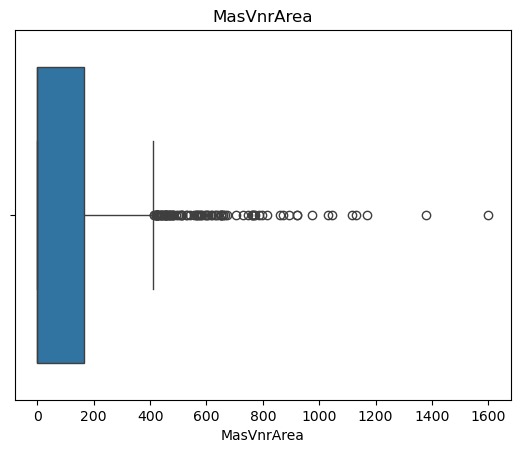

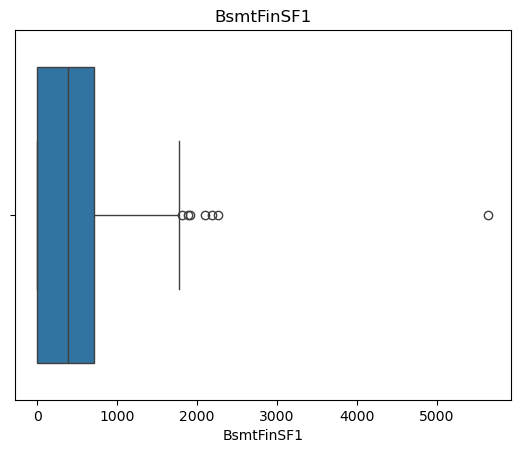

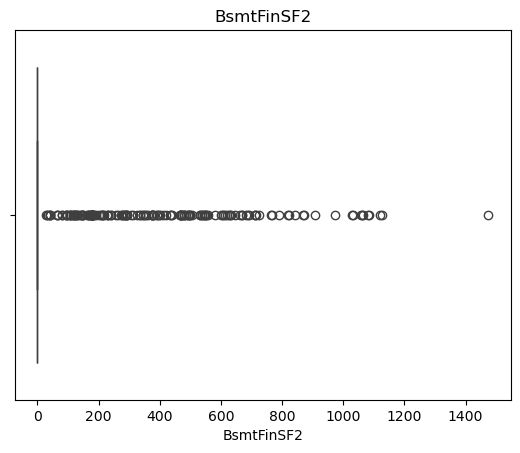

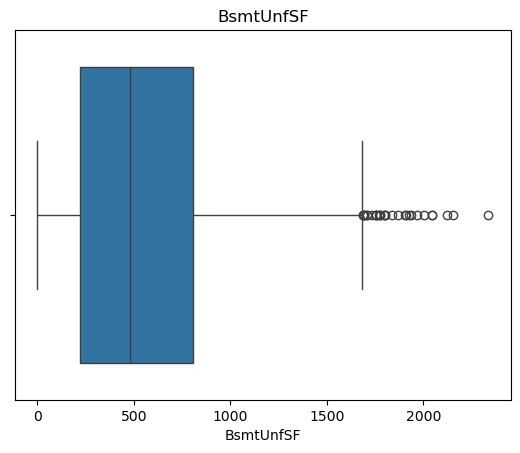

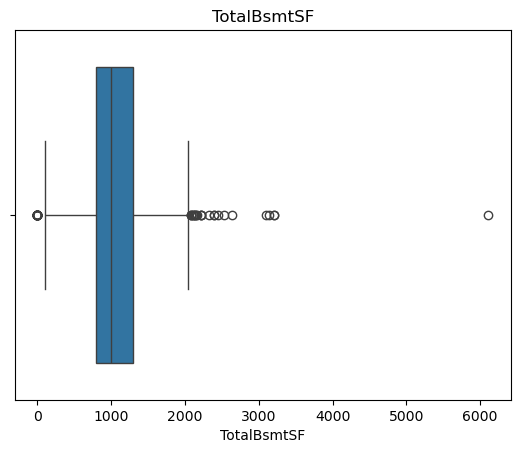

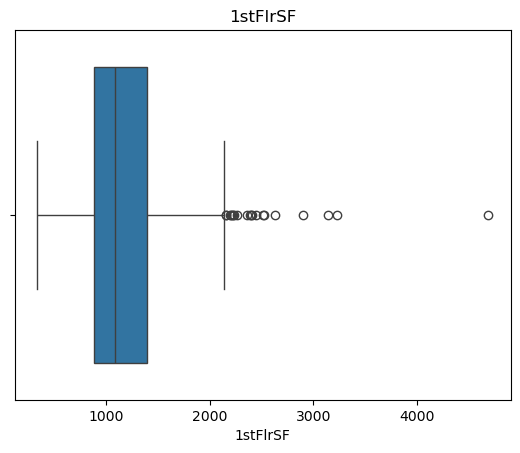

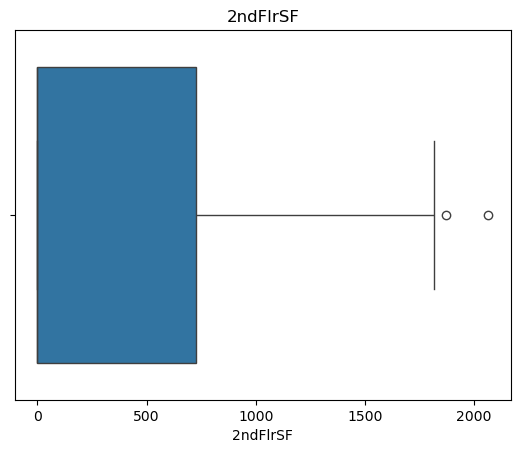

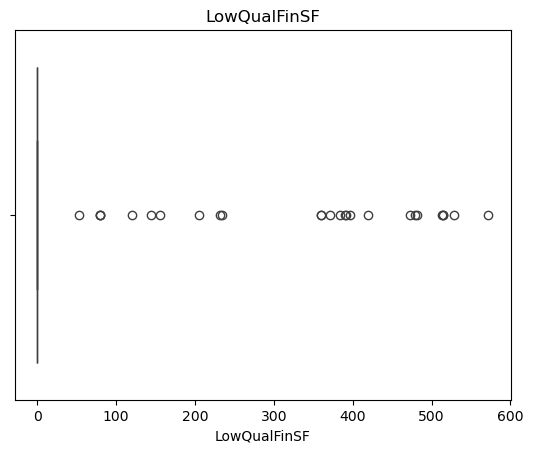

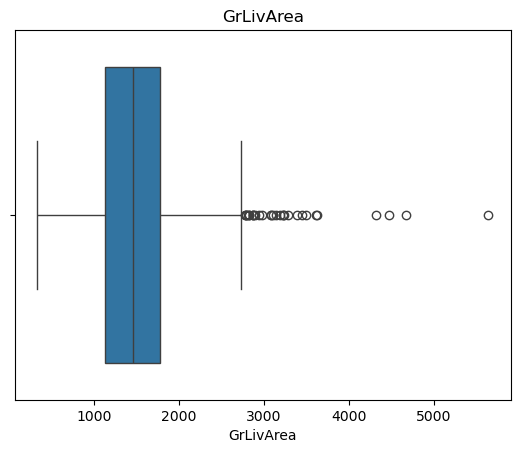

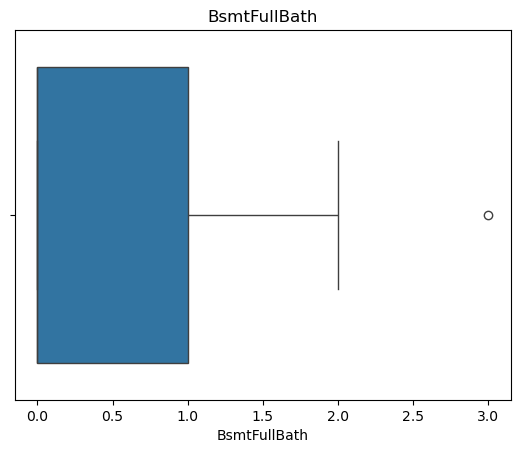

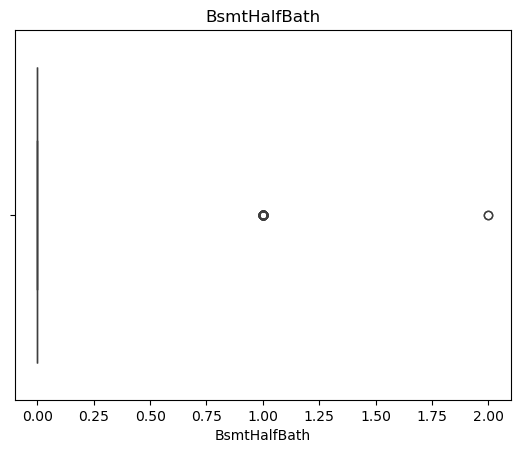

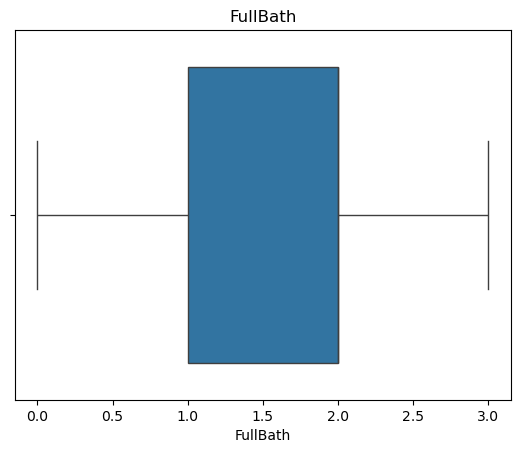

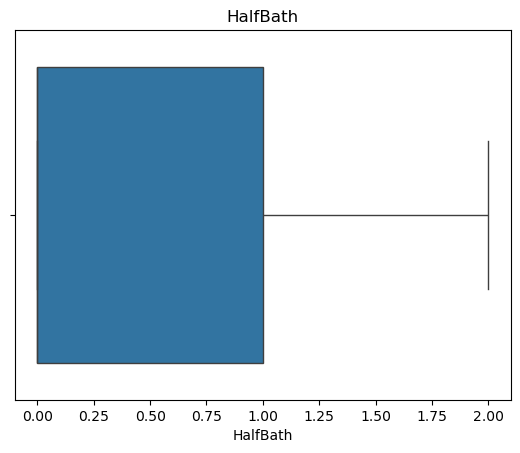

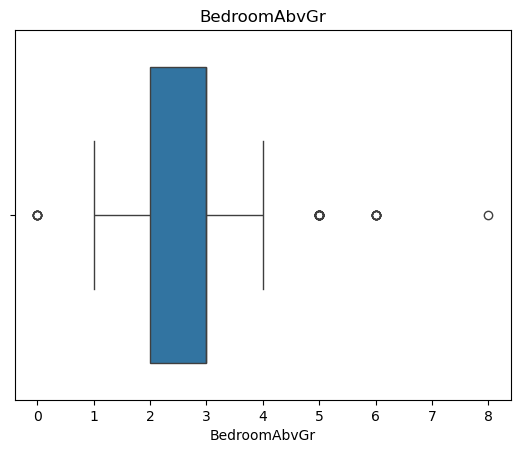

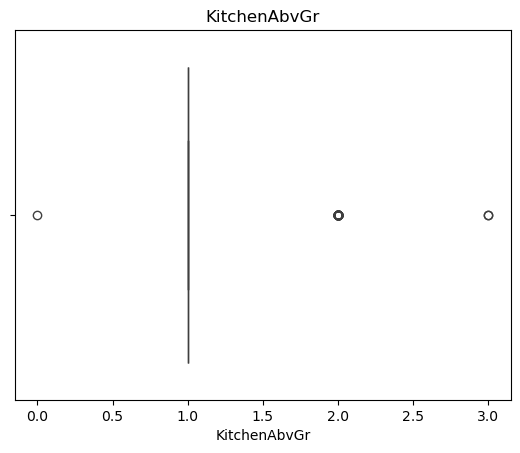

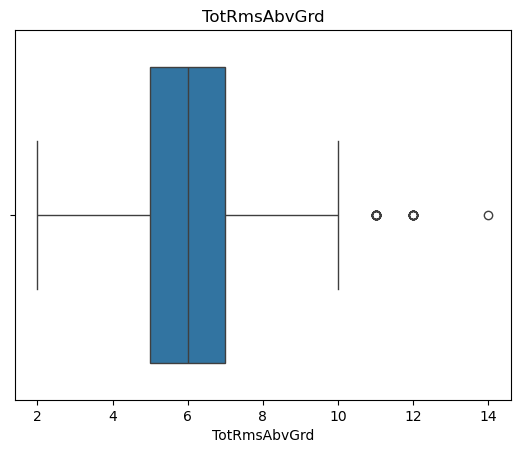

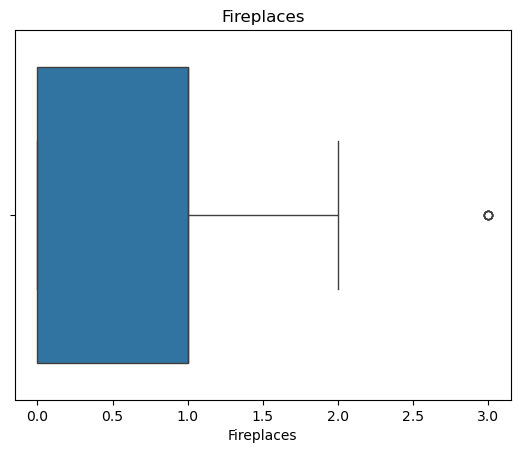

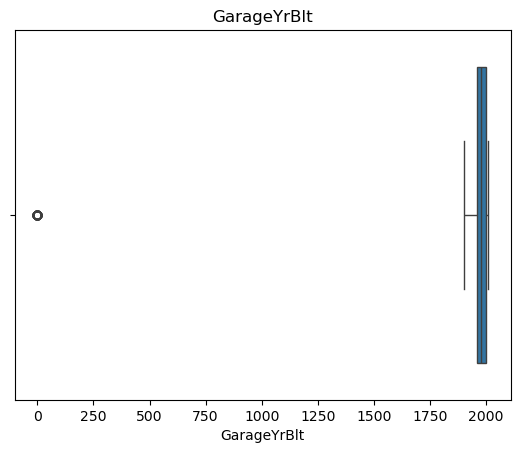

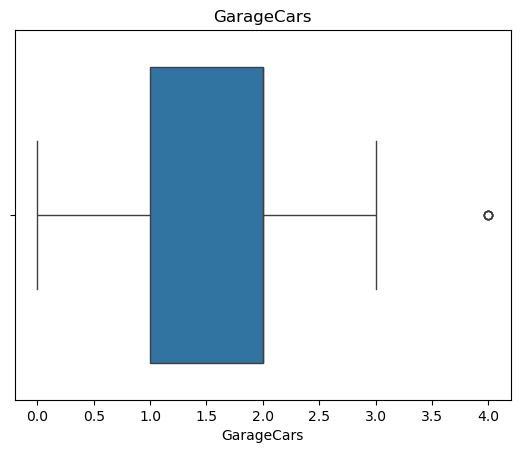

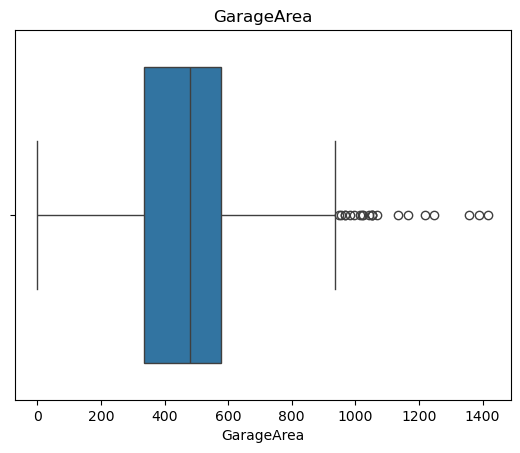

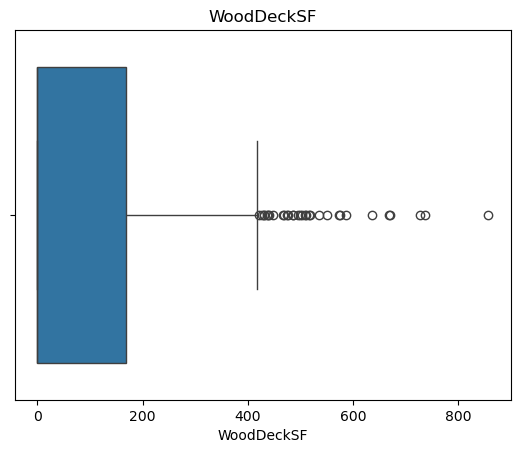

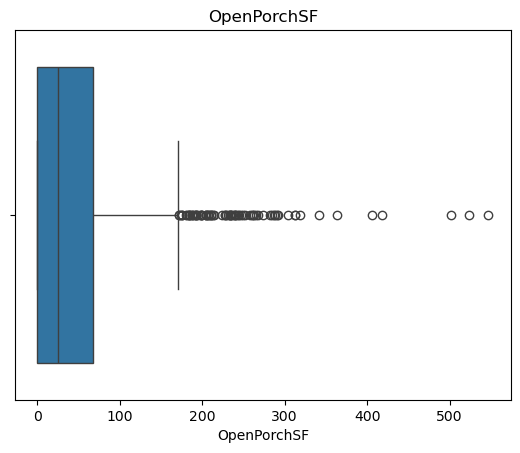

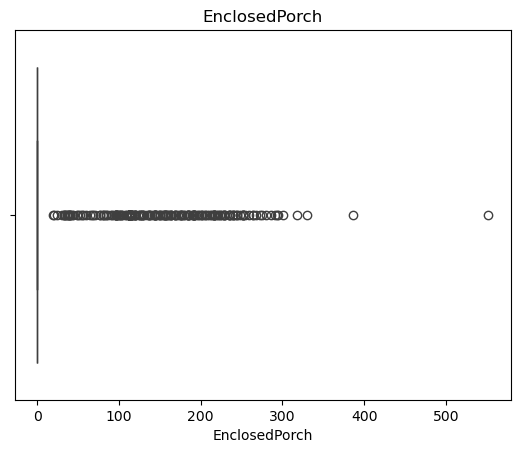

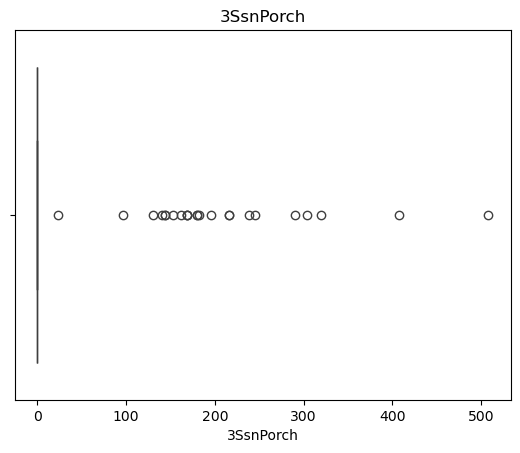

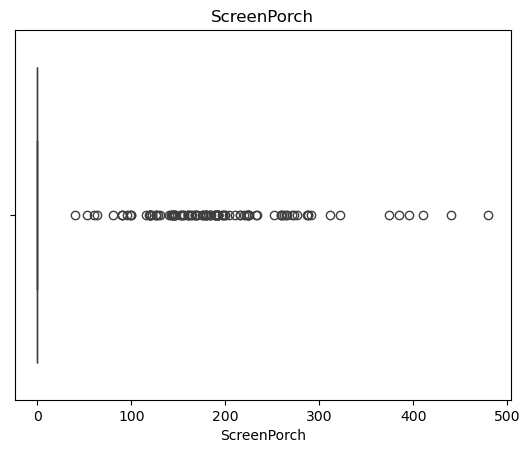

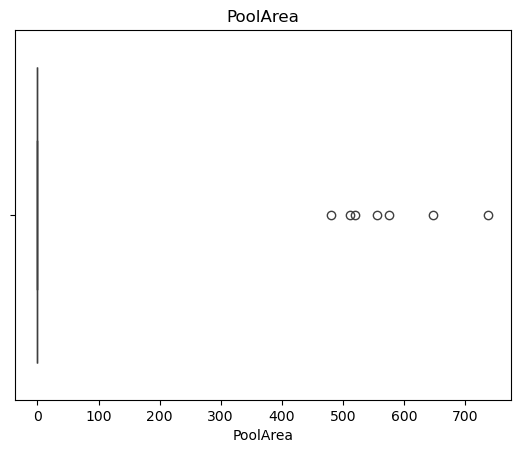

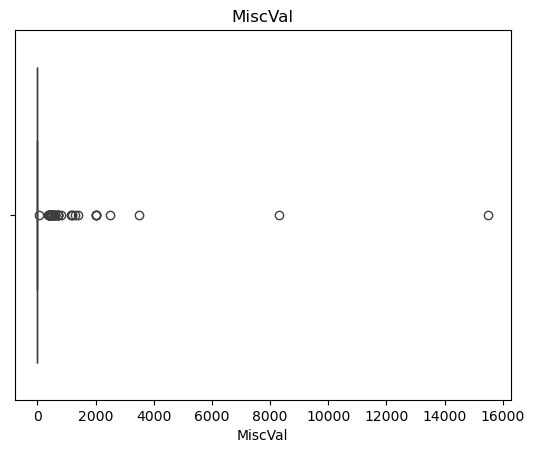

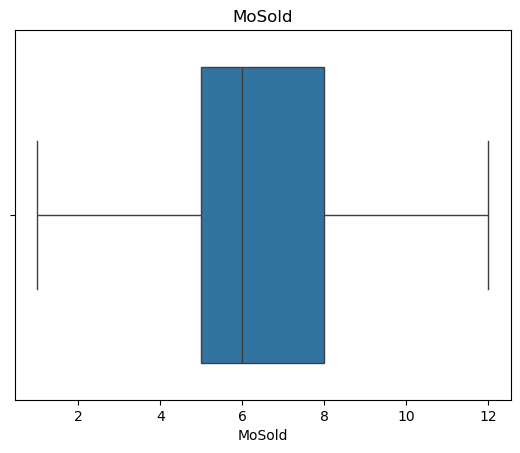

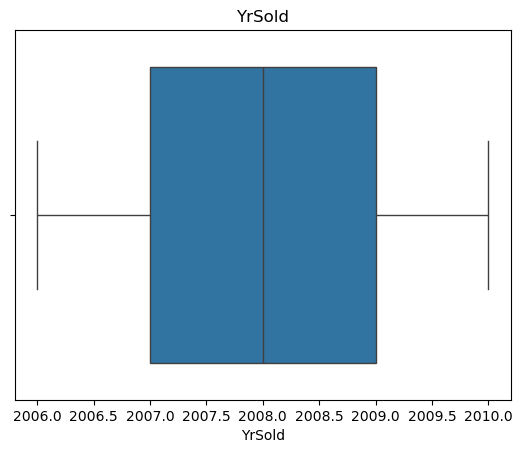

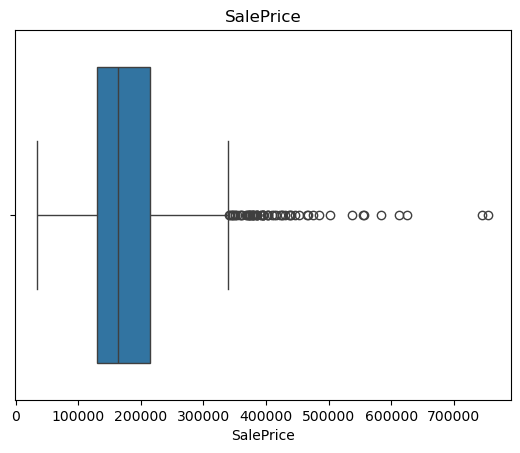

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
high_cols = outliers.index
for c in high_cols:
    sns.boxplot(x=df[c])
    plt.title(c)
    plt.show()


### Capping

In [42]:
df[num_cols] = np.where(df[num_cols] < lower, lower, df[num_cols])
df[num_cols] = np.where(df[num_cols] > upper, upper, df[num_cols])

In [43]:
outliers_after=((df[num_cols] < lower) | (df[num_cols] > upper)).sum()

In [44]:
print(outliers_after)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


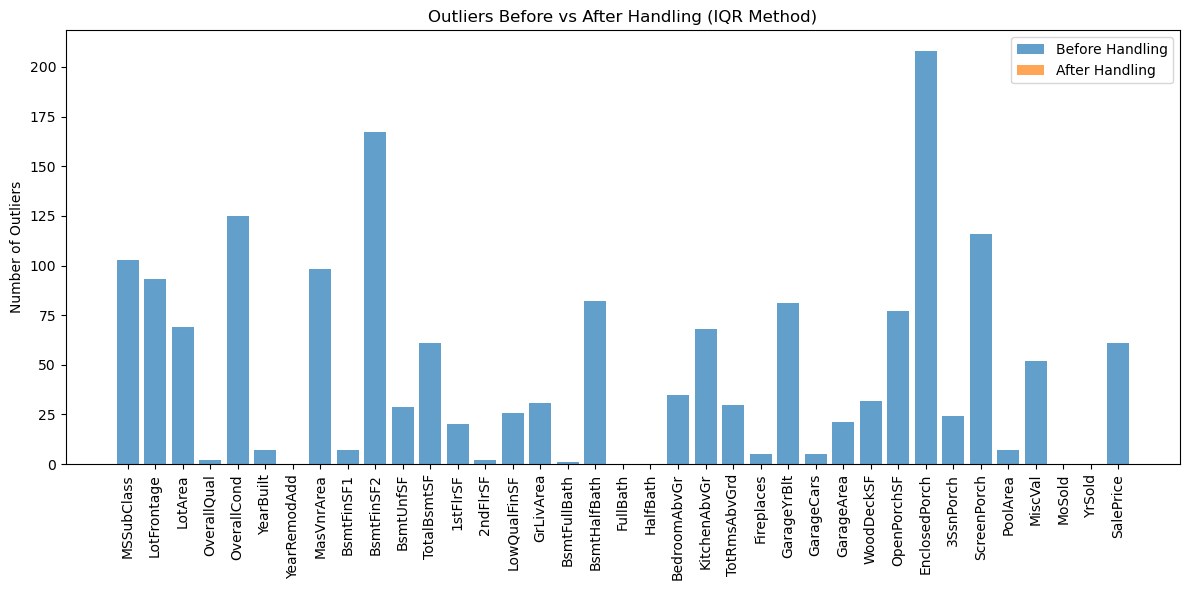

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(outliers.index, outliers.values, label='Before Handling', alpha=0.7)
plt.bar(outliers_after.index, outliers_after.values, label='After Handling', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Number of Outliers")
plt.title("Outliers Before vs After Handling (IQR Method)")
plt.legend()
plt.tight_layout()
plt.show()

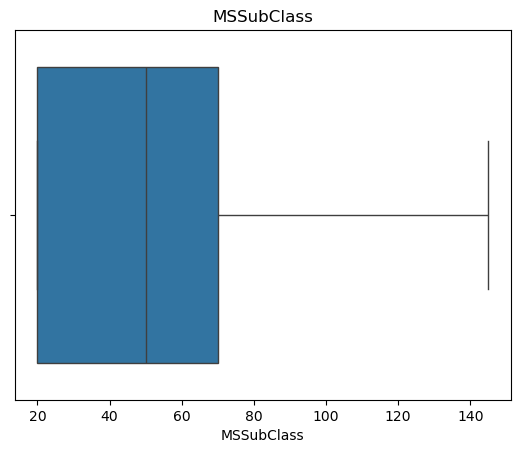

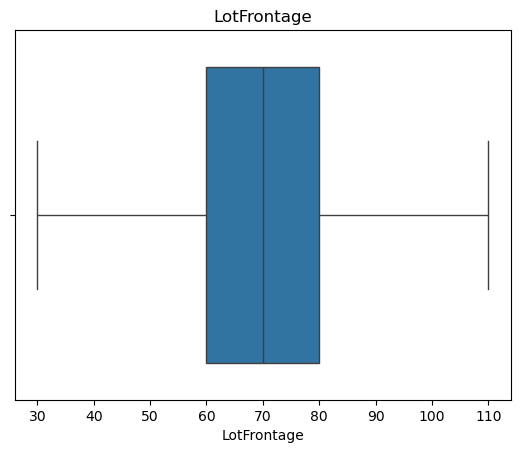

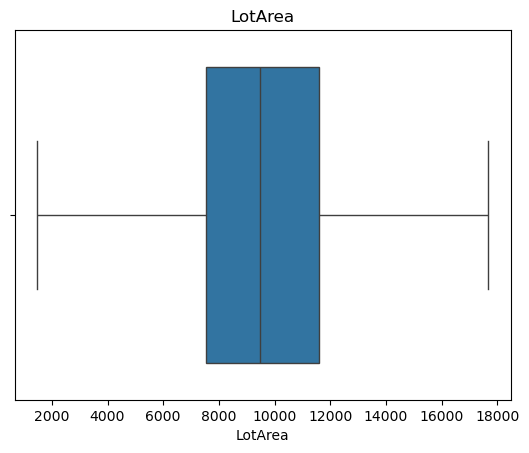

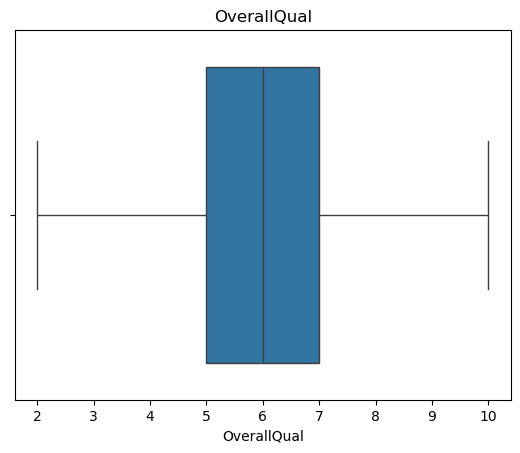

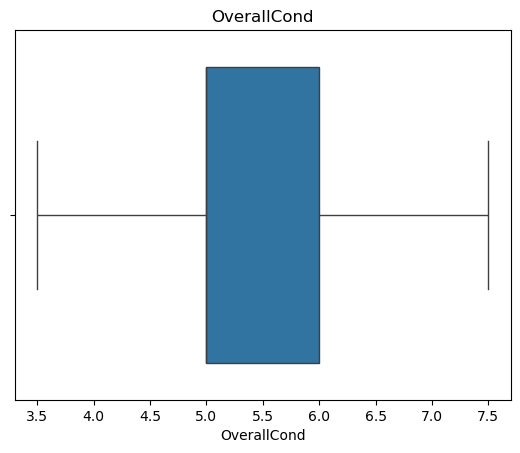

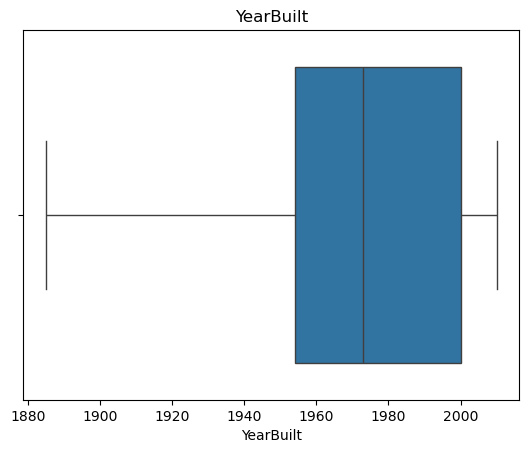

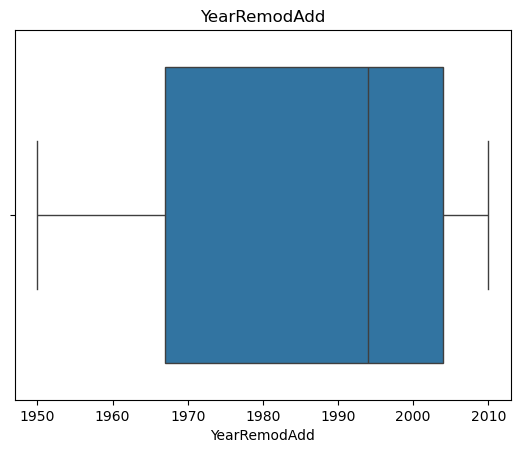

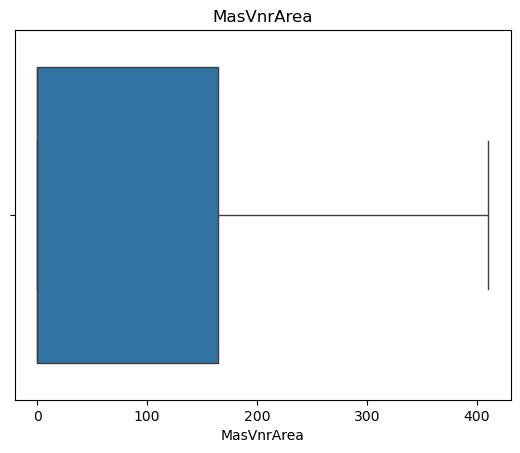

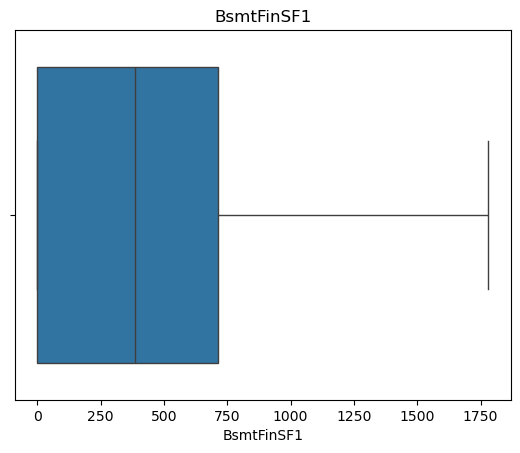

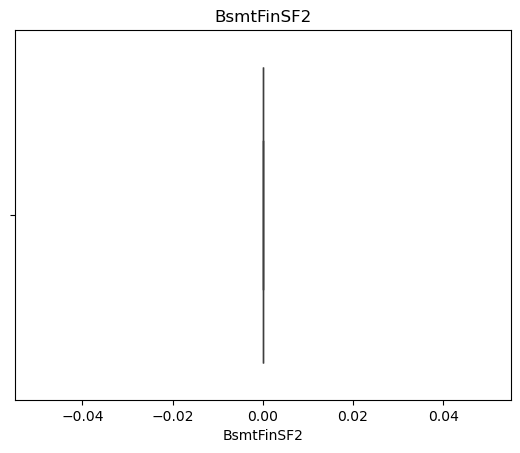

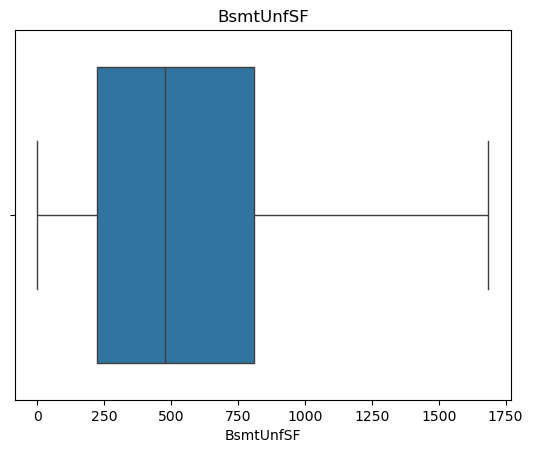

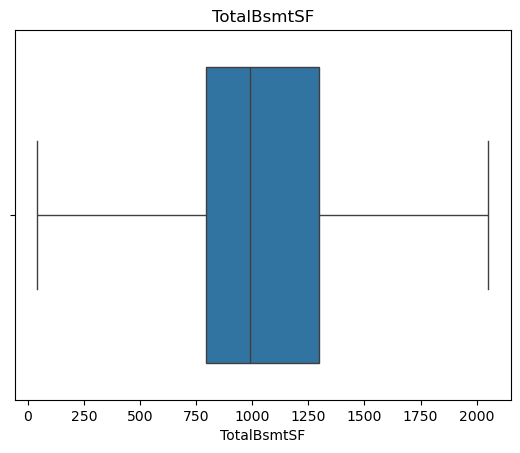

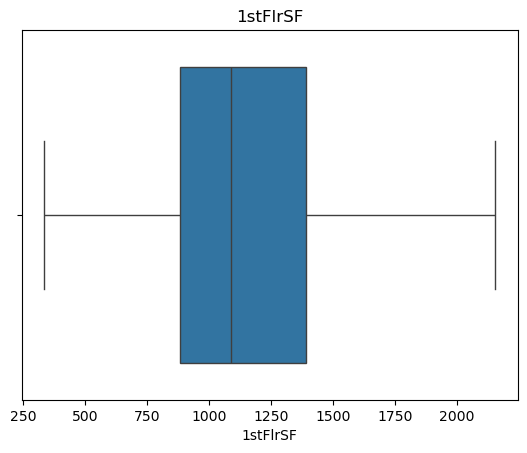

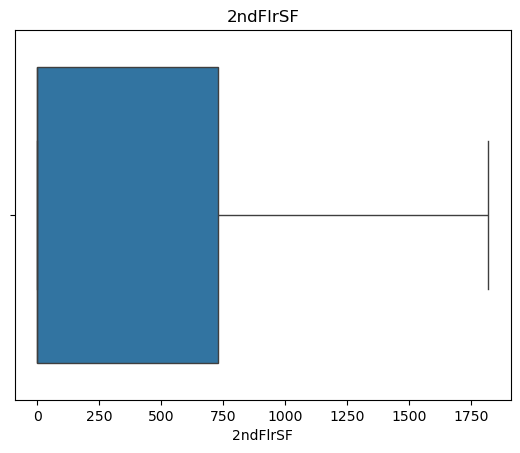

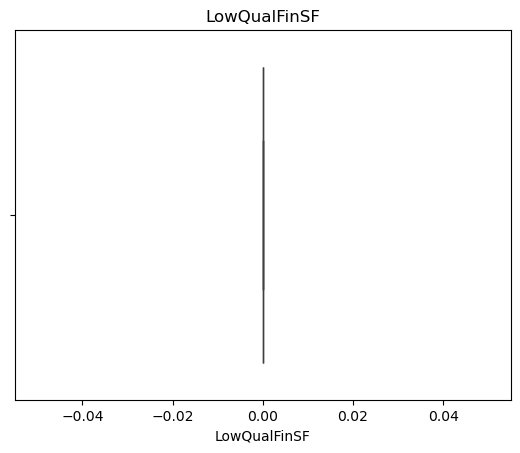

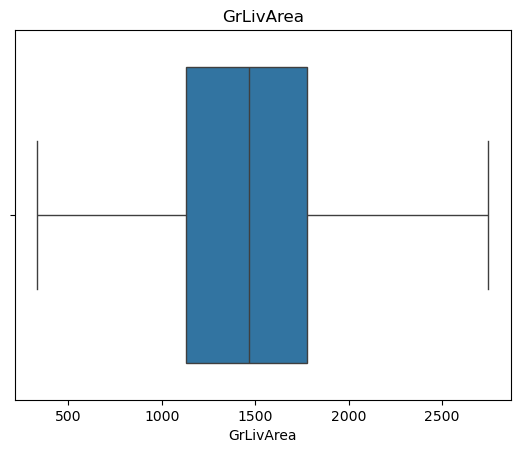

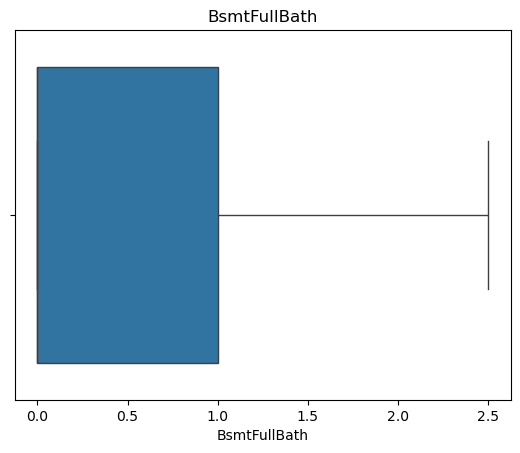

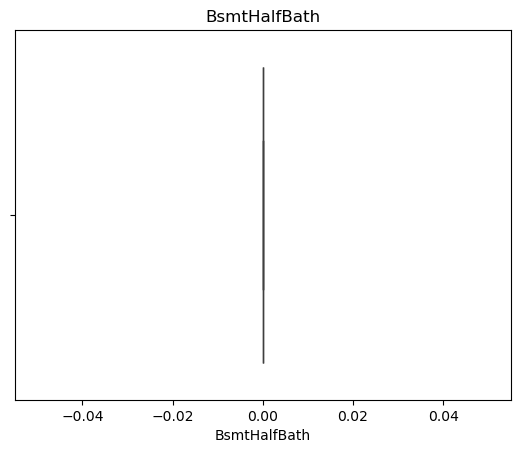

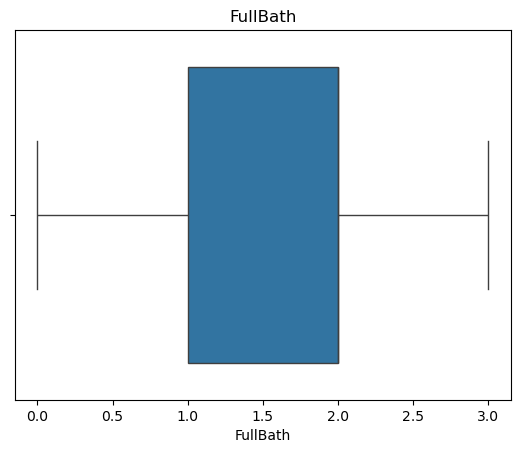

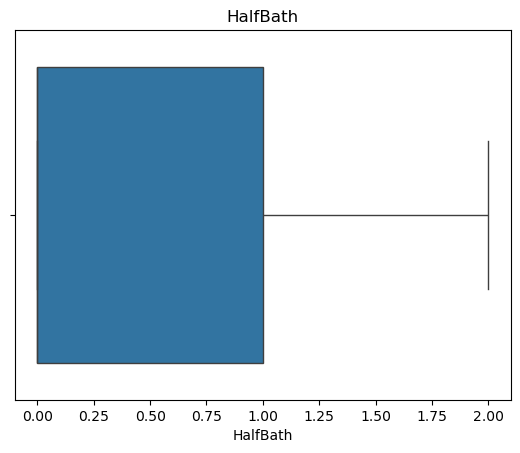

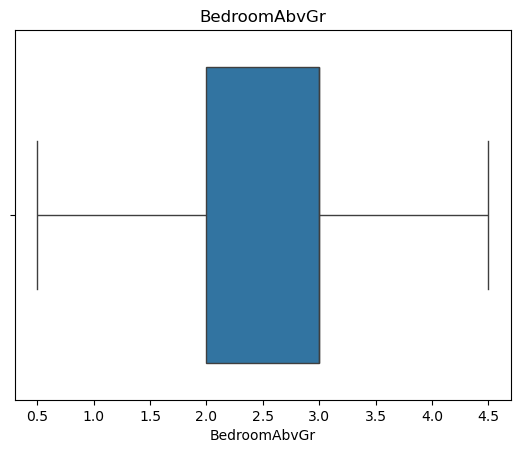

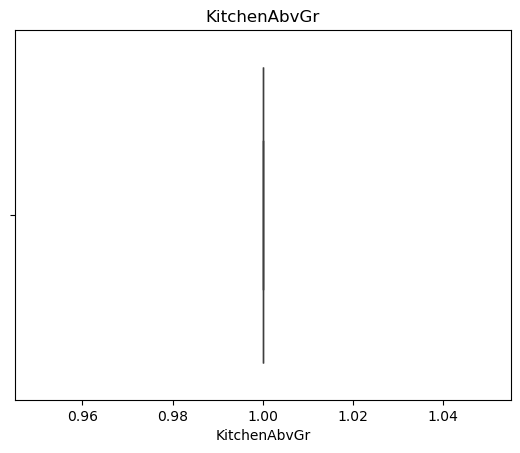

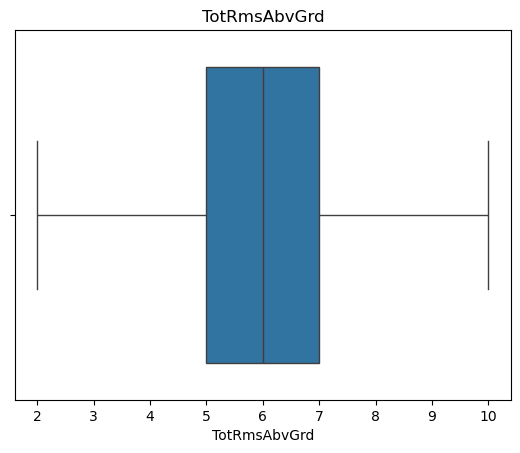

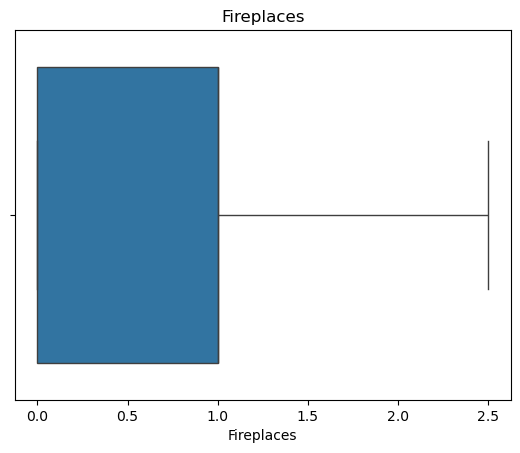

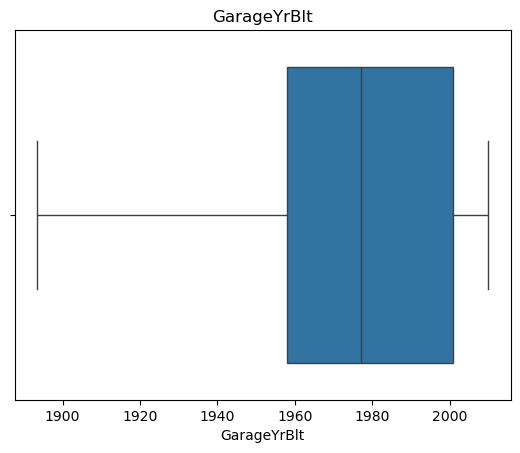

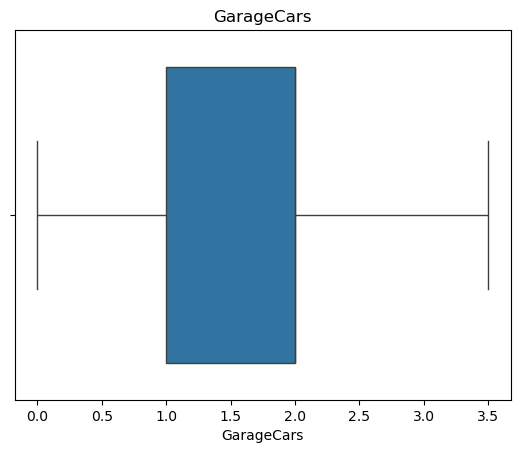

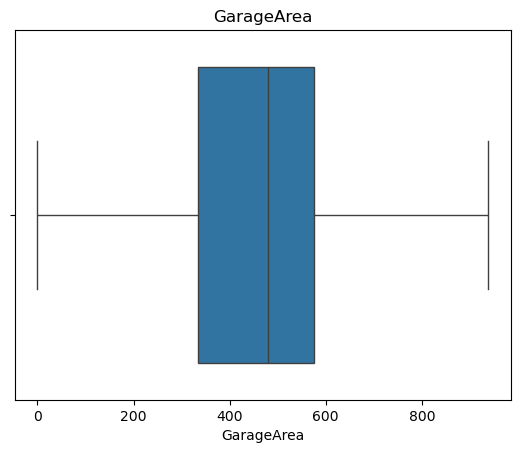

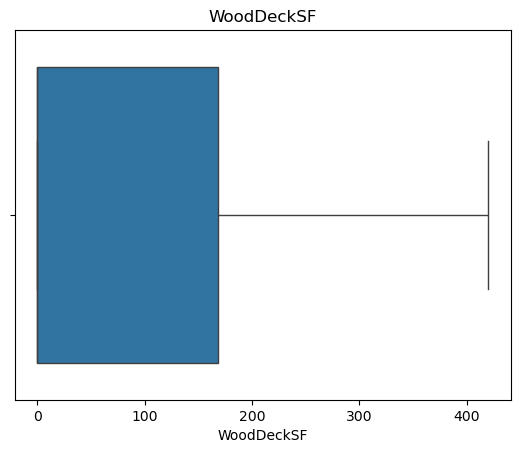

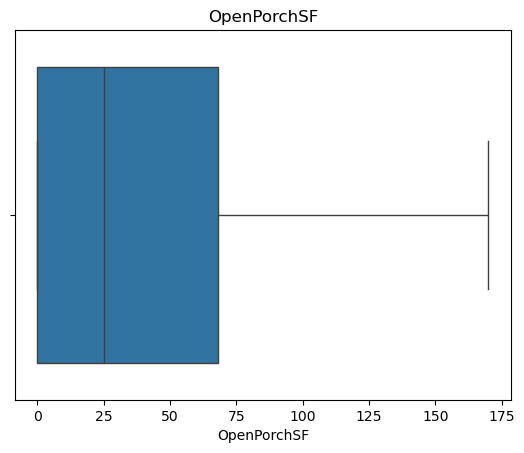

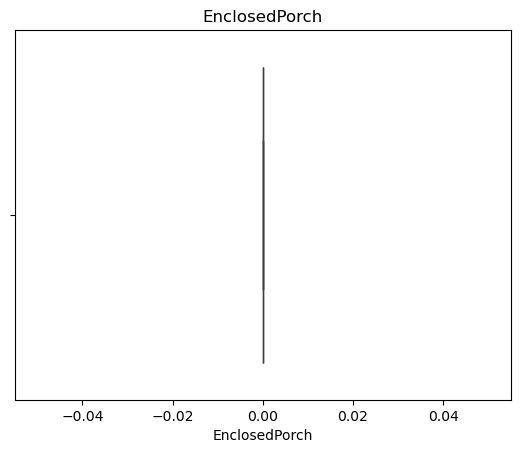

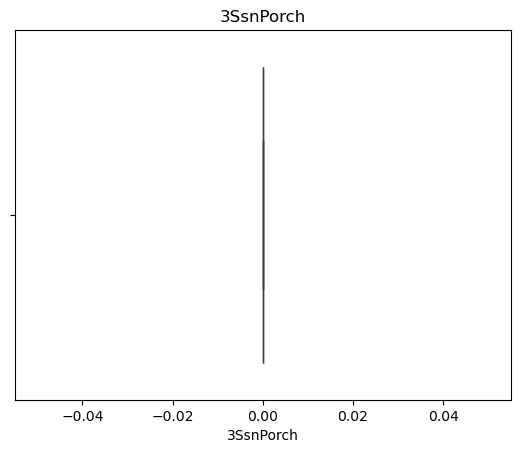

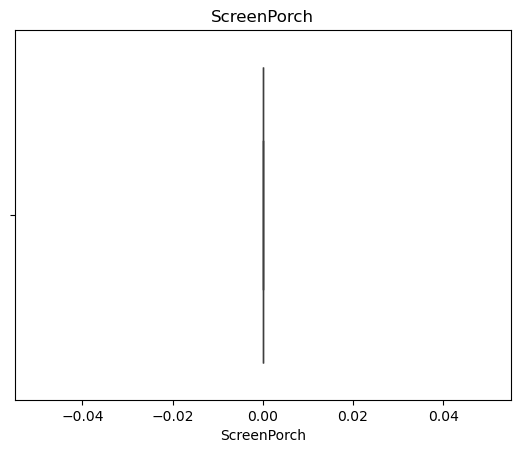

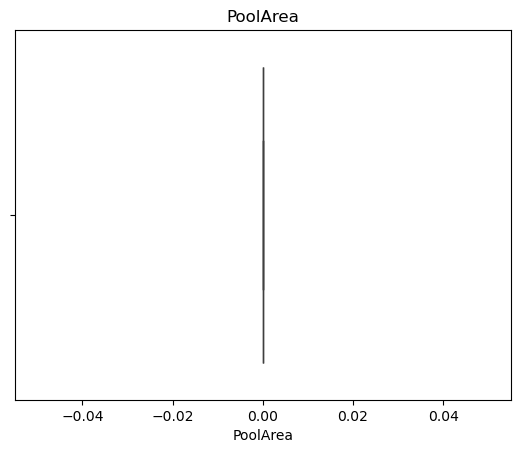

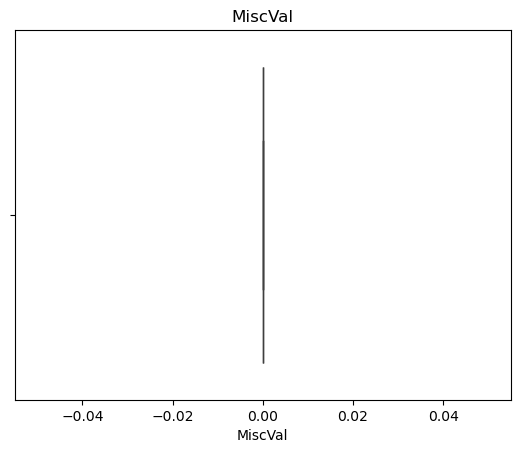

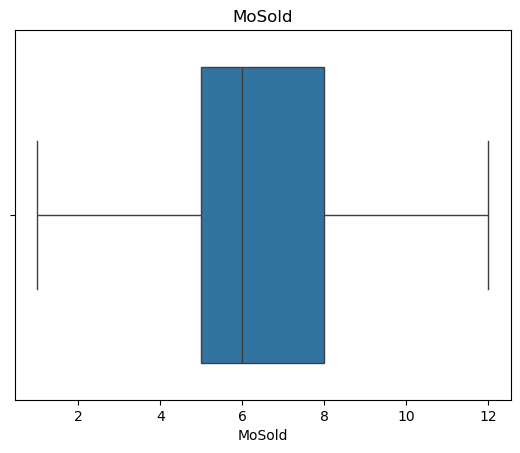

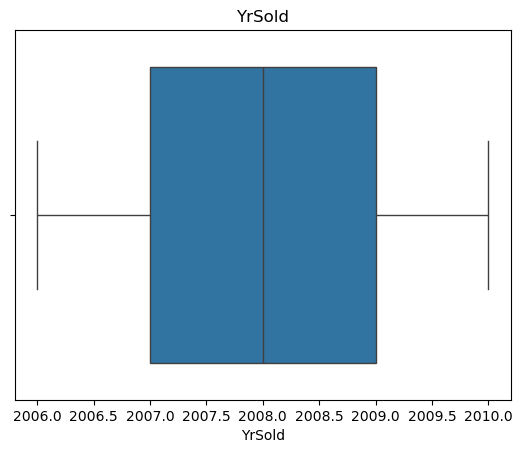

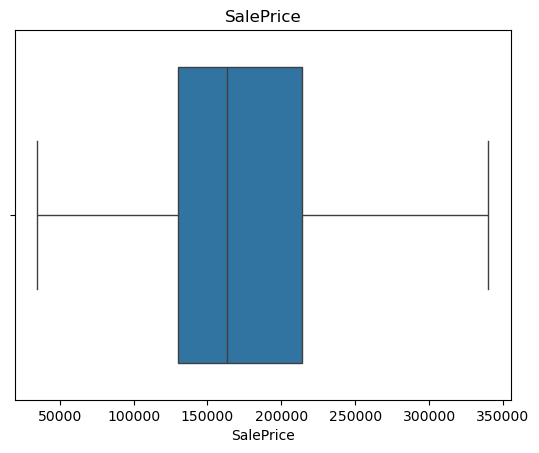

In [46]:
high_cols = outliers_after.index
for c in high_cols:
    sns.boxplot(x=df[c])
    plt.title(c)
    plt.show()

# EDA(Exploratory Data Analysis)

## Correlation Heatmap (Numeric Features)

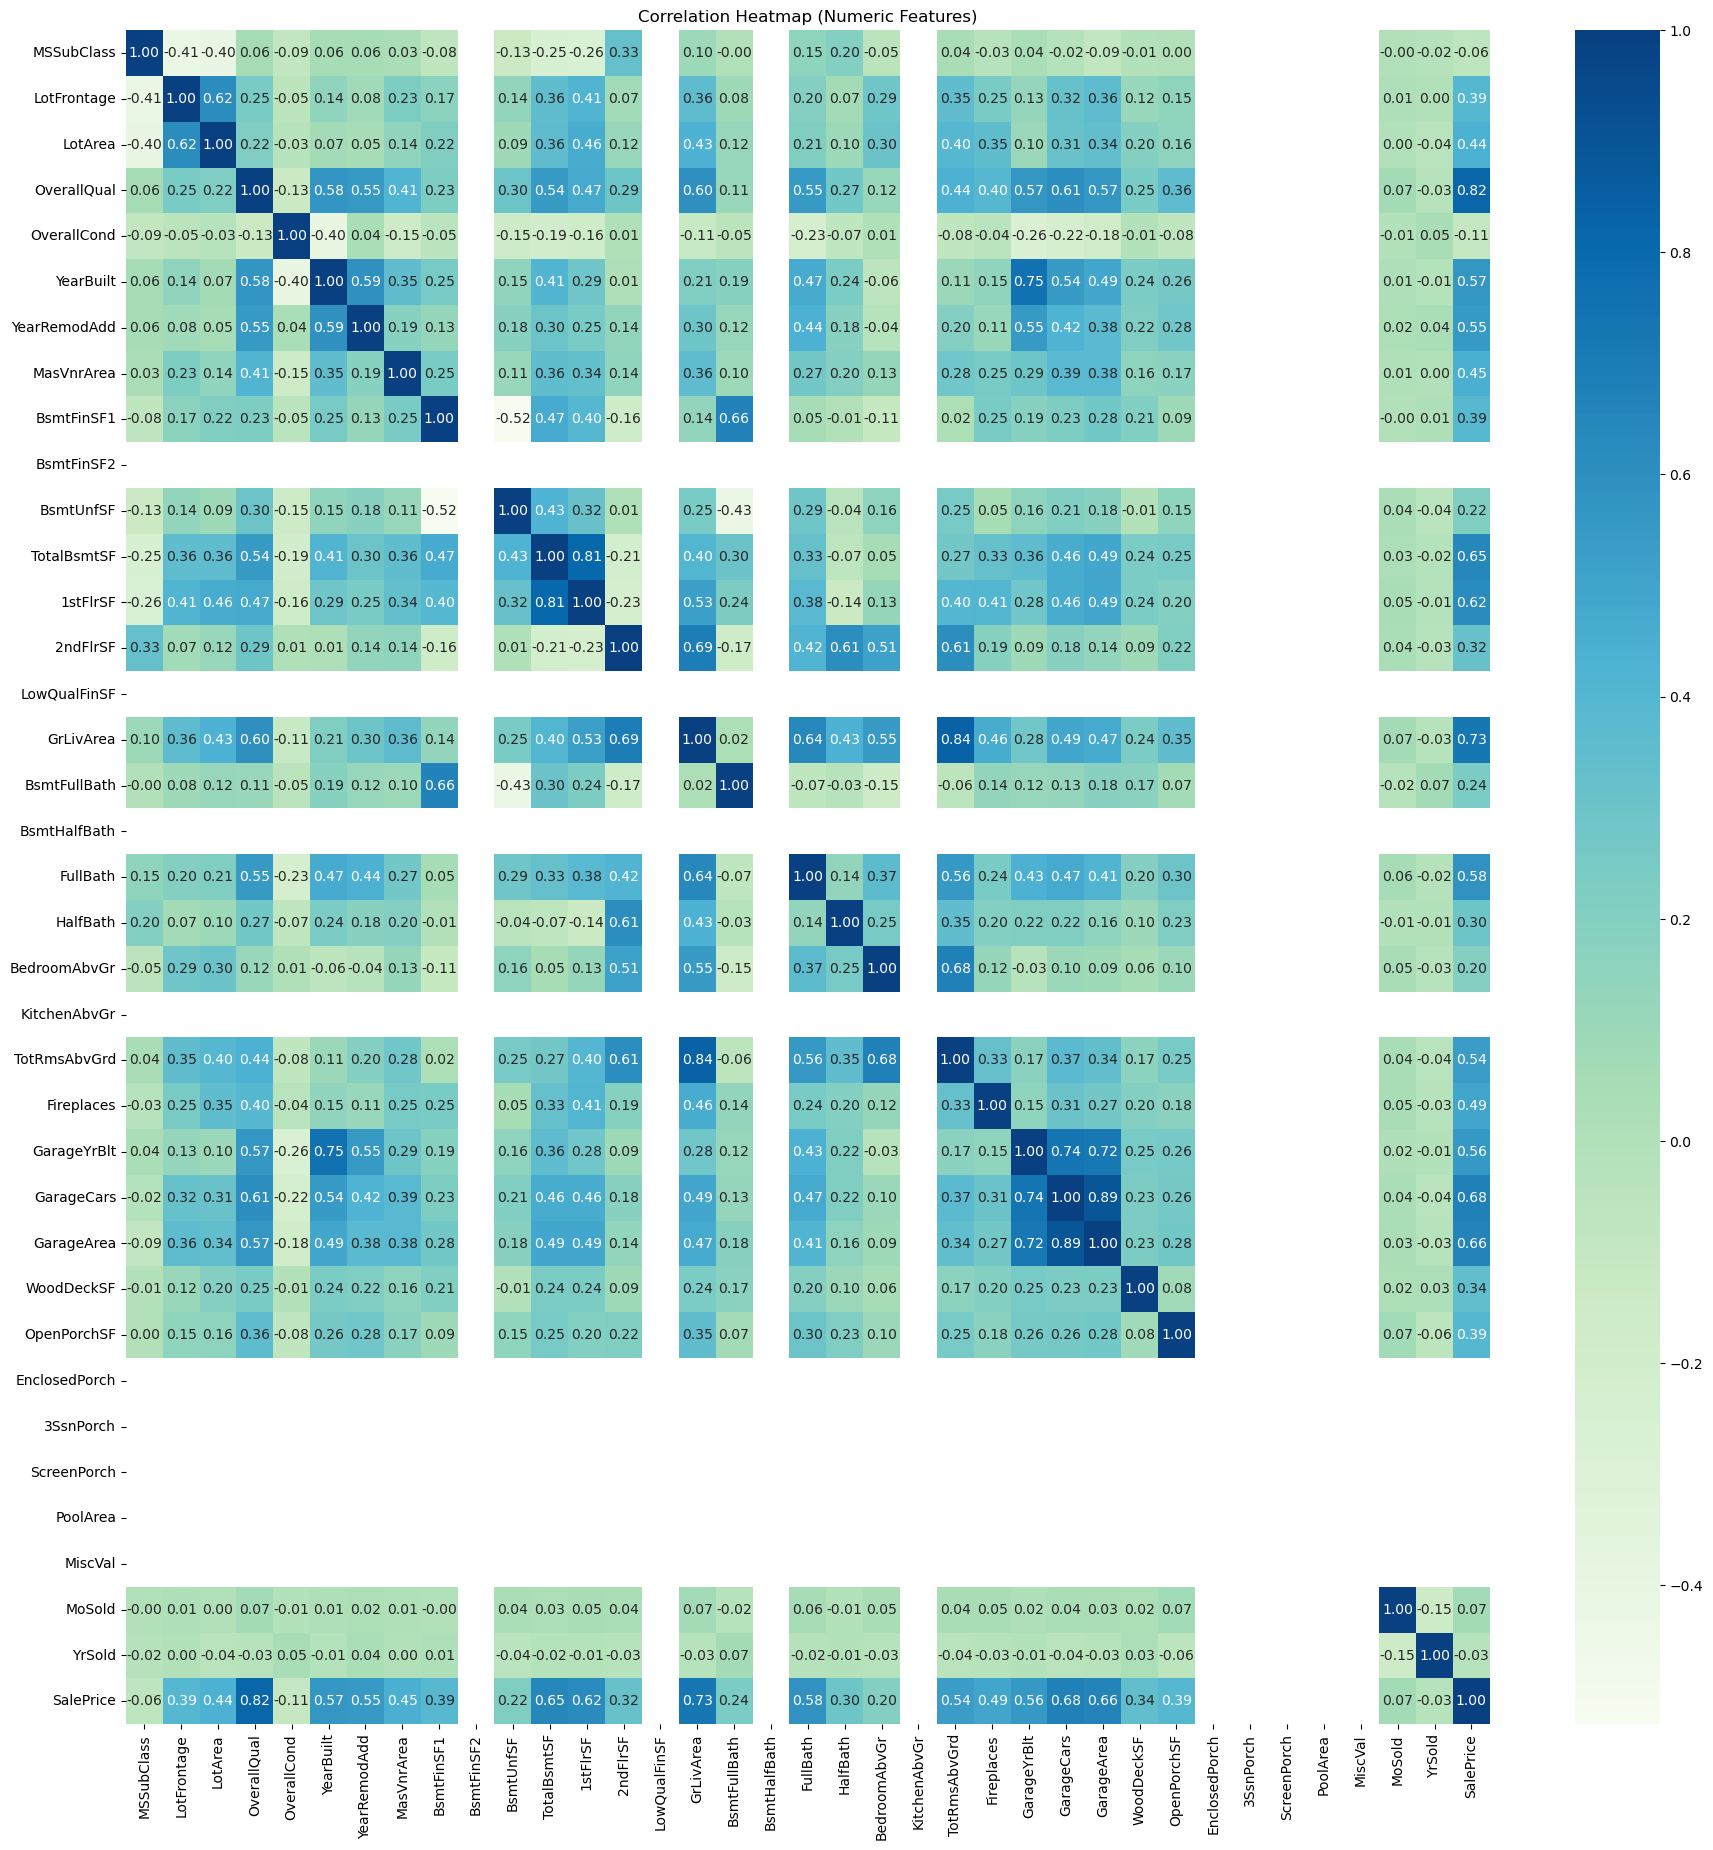

SalePrice      1.000000
OverallQual    0.817680
GrLivArea      0.729311
GarageCars     0.675896
GarageArea     0.660029
TotalBsmtSF    0.645251
1stFlrSF       0.621873
FullBath       0.583994
YearBuilt      0.570327
GarageYrBlt    0.558816
Name: SalePrice, dtype: float64


In [47]:
plt.figure(figsize=(22, 22))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f',cmap='GnBu',)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Top 10 correlated with SalePrice
corr_target = corr["SalePrice"].sort_values(ascending=False).head(10)
print(corr_target)

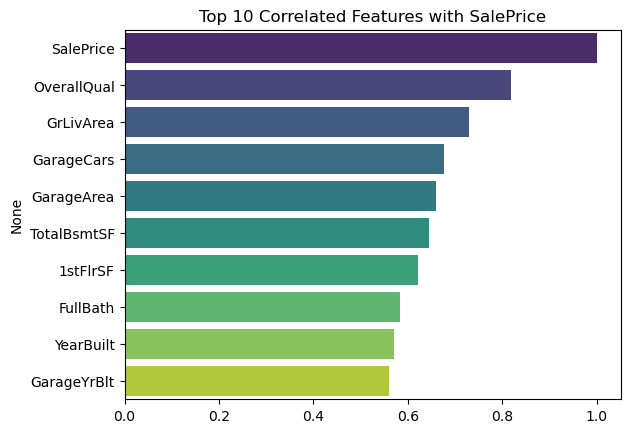

In [48]:
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Correlated Features with SalePrice')
plt.show()

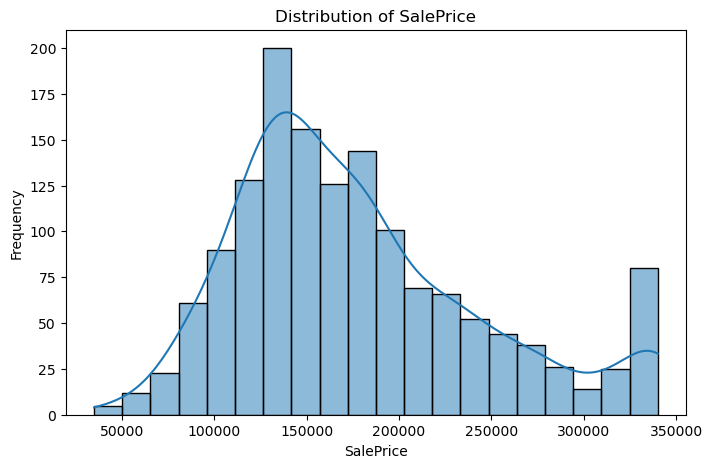

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'],kde=True, bins= 20)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

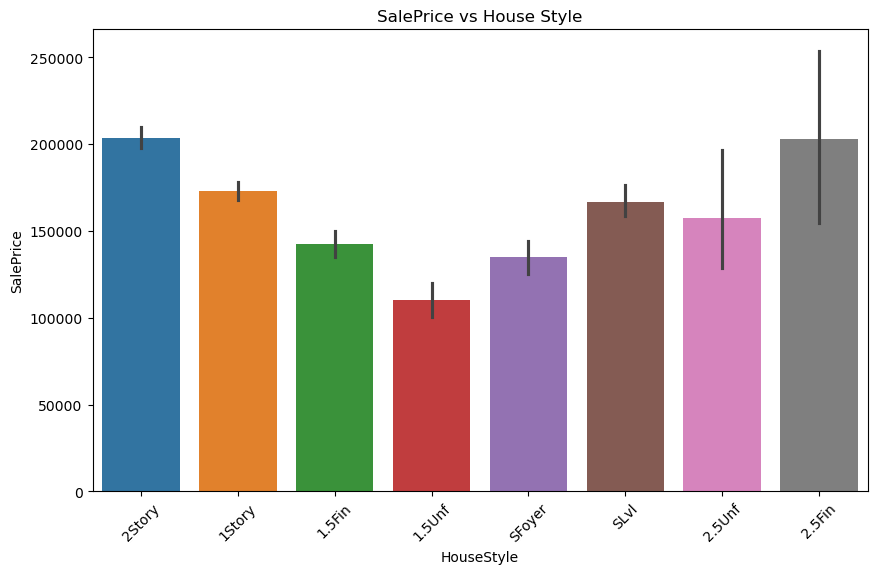

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="HouseStyle", y="SalePrice", data=df,hue= 'HouseStyle')
plt.title("SalePrice vs House Style")
plt.xticks(rotation=45)
plt.show()

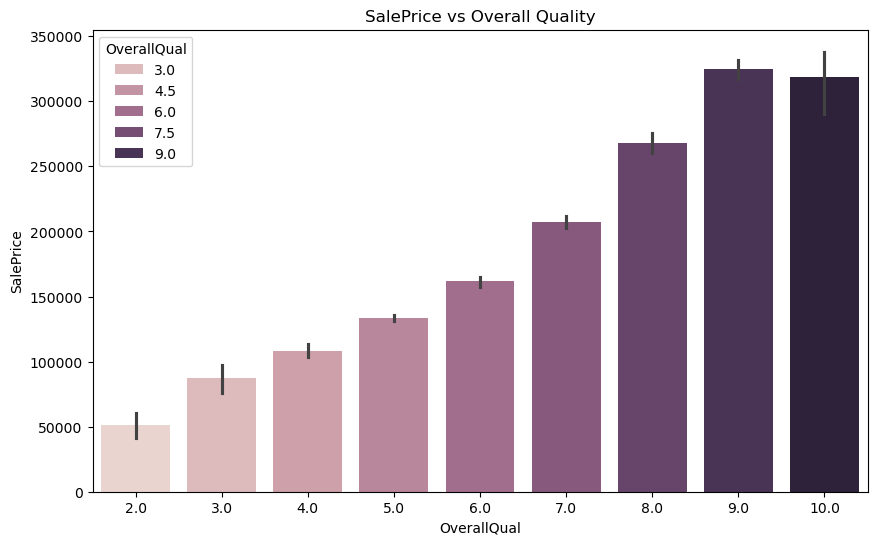

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="OverallQual", y="SalePrice", data=df, hue= 'OverallQual')
plt.title("SalePrice vs Overall Quality")
plt.show()

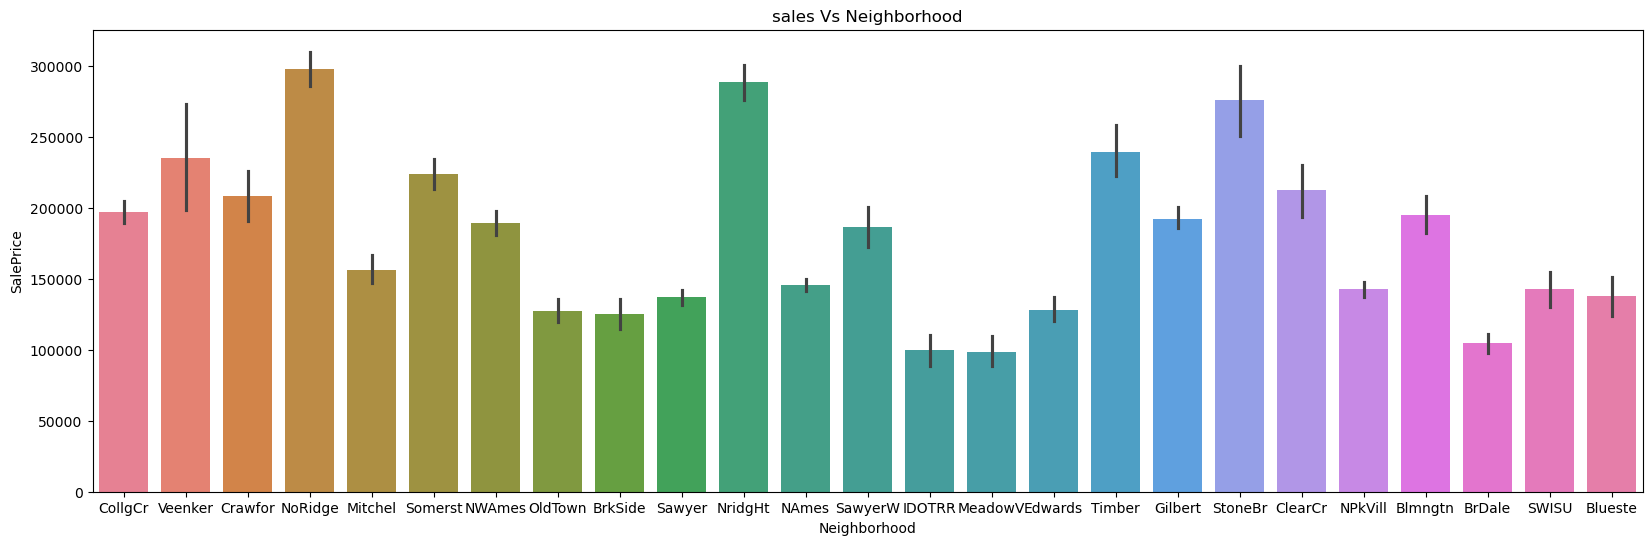

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(x='Neighborhood', y='SalePrice',data=df,hue='Neighborhood')
plt.title('sales Vs Neighborhood')
plt.show()

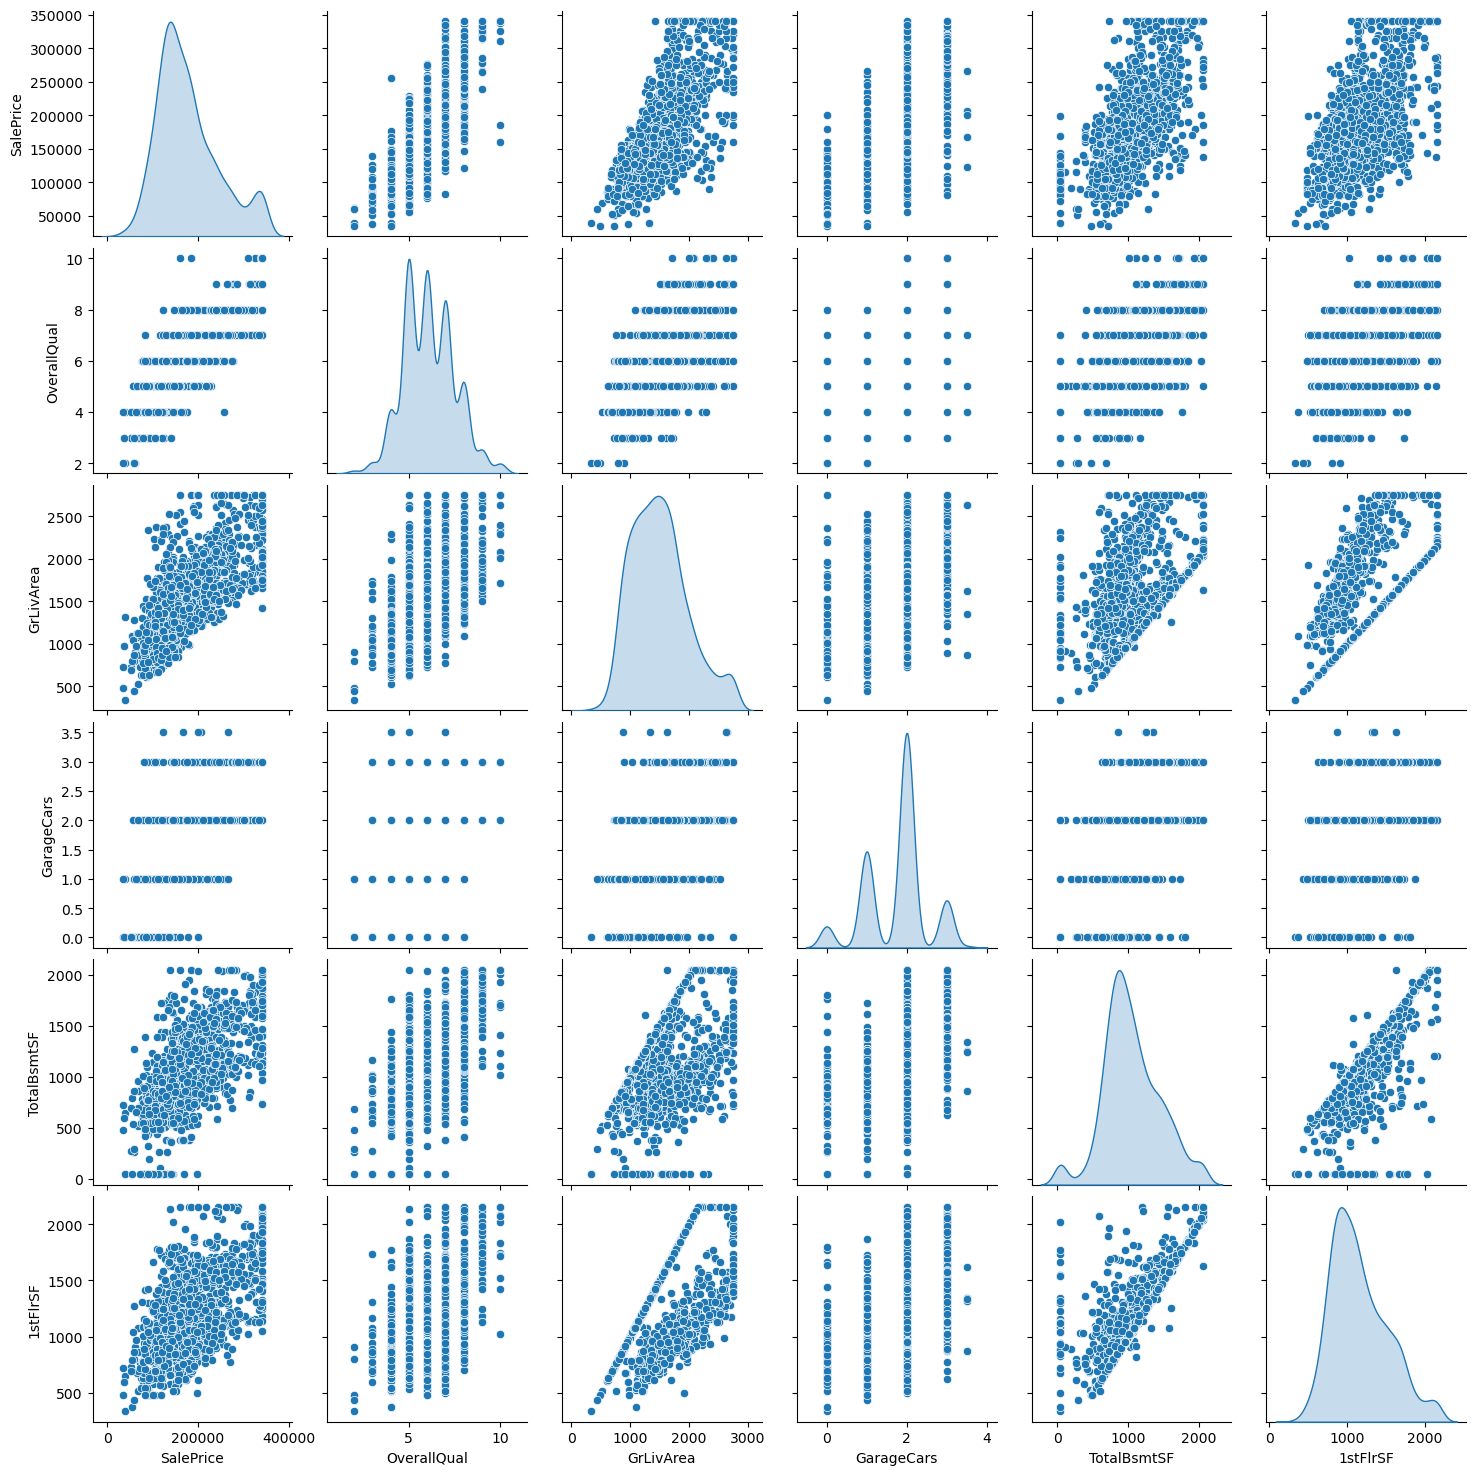

In [53]:
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(df[top_features], diag_kind='kde')
plt.show()

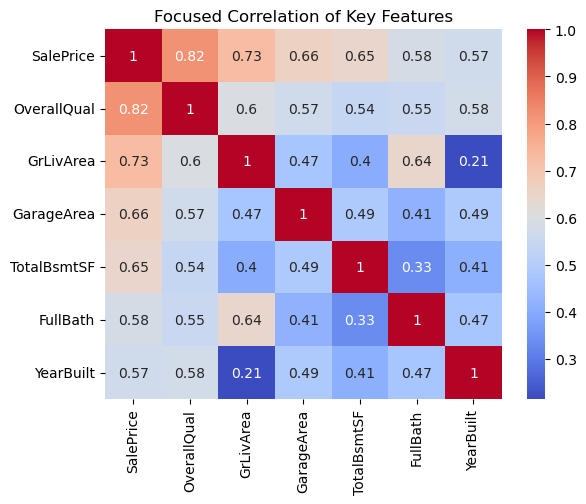

In [54]:
selected = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.heatmap(df[selected].corr(), annot=True, cmap='coolwarm')
plt.title('Focused Correlation of Key Features')
plt.show()

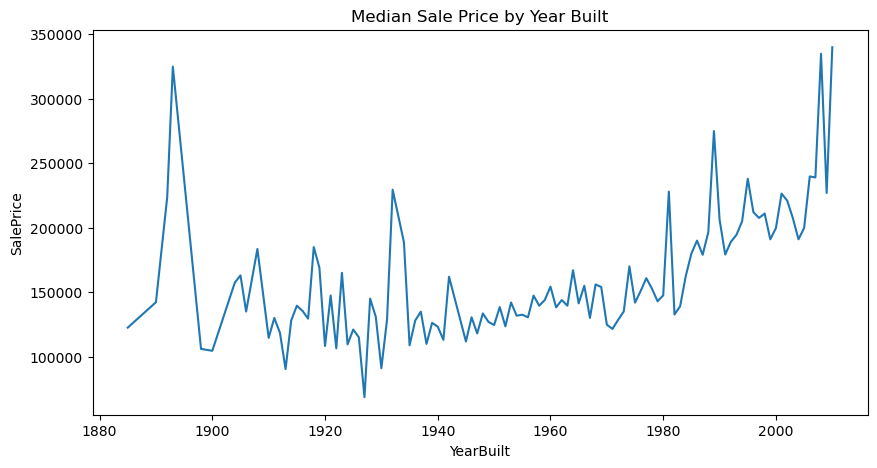

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(x='YearBuilt', y='SalePrice', data=df, estimator='median', ci=None)
plt.title('Median Sale Price by Year Built')
plt.show()

## Feature engineering

In [56]:
from scipy.stats import skew
import numpy as np

skewed_feats = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: skew(x.dropna()))
skewed_cols = skewed_feats[abs(skewed_feats) > 0.5].index

df[skewed_cols] = np.log1p(df[skewed_cols])

### preprocessing

In [57]:
# Encode categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
cat_feats = [...]
num_feats = [...]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
    ('num', StandardScaler(), num_feats)
])

In [58]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,856.0,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,8.0,Typ,0.000000,None,Attchd,7.602900,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,12.247699
1,3.044522,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,2.140066,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,1262.0,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.0,2.0,0.000000,3.0,1.0,TA,6.0,Typ,0.693147,TA,Attchd,7.589336,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,12.109016
2,4.110874,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,920.0,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,6.0,Typ,0.693147,TA,Attchd,7.601902,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,12.317171
3,4.262680,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,1.791759,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,756.0,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.0,1.0,0.000000,3.0,1.0,Gd,7.0,Typ,0.693147,Gd,Detchd,7.600402,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,11.849405
4,4.110874,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,1.791759,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,1145.0,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.0,2.0,0.693147,4.0,1.0,Gd,9.0,Typ,0.693147,TA,Attchd,7.601402,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,12.429220


In [59]:
df3= df.copy()
df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,856.0,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,8.0,Typ,0.000000,None,Attchd,7.602900,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,12.247699
1,3.044522,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,2.140066,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,1262.0,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.0,2.0,0.000000,3.0,1.0,TA,6.0,Typ,0.693147,TA,Attchd,7.589336,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,12.109016
2,4.110874,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,920.0,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,6.0,Typ,0.693147,TA,Attchd,7.601902,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,12.317171
3,4.262680,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,1.791759,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,756.0,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.0,1.0,0.000000,3.0,1.0,Gd,7.0,Typ,0.693147,Gd,Detchd,7.600402,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,11.849405
4,4.110874,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,1.791759,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,1145.0,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.0,2.0,0.693147,4.0,1.0,Gd,9.0,Typ,0.693147,TA,Attchd,7.601402,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,12.429220


In [60]:
# Create new features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBathrooms'] = (df['FullBath'] + df['BsmtFullBath'] +0.5*(df['HalfBath'] + df['BsmtHalfBath']))
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['OverallGrade'] = df['OverallQual'] * df['OverallCond']

In [61]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,HouseAge,OverallGrade
0,4.110874,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,856.0,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,8.0,Typ,0.000000,None,Attchd,7.602900,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,12.247699,869.504539,3.039721,2000.397100,12.542316
1,3.044522,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,2.140066,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,1262.0,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.0,2.0,0.000000,3.0,1.0,TA,6.0,Typ,0.693147,TA,Attchd,7.589336,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,12.109016,1269.141245,2.000000,1999.410664,12.840397
2,4.110874,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,1.791759,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,920.0,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.0,2.0,0.693147,3.0,1.0,Gd,6.0,Typ,0.693147,TA,Attchd,7.601902,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,12.317171,933.590499,3.039721,2000.398098,12.542316
3,4.262680,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,1.791759,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,756.0,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.0,1.0,0.000000,3.0,1.0,Gd,7.0,Typ,0.693147,Gd,Detchd,7.600402,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,11.849405,769.498378,1.693147,1998.442005,12.542316
4,4.110874,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,1.791759,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,1145.0,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.0,2.0,0.693147,4.0,1.0,Gd,9.0,Typ,0.693147,TA,Attchd,7.601402,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,12.429220,1159.004381,3.039721,2000.398598,14.334076


In [62]:
X = df.drop('SalePrice', axis=1)
Y = np.log1p(df['SalePrice'])

## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
df.shape

(1460, 83)

In [65]:
X_train.shape

(1168, 82)

In [66]:
X_test.shape

(292, 82)

In [67]:
Y_train.shape

(1168,)

In [68]:
Y_test.shape

(292,)

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

# Detect numeric & categorical features
num_feats = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_feats = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preproc = ColumnTransformer([
    ('num', num_pipe, num_feats),
    ('cat', cat_pipe, cat_feats)
])

# Full pipeline
ln = Pipeline([
    ('preproc', preproc),
    ('model', LinearRegression())
])

# Fit
ln.fit(X_train, Y_train)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model', LinearRegression())])

In [70]:
Y_pred_ln = ln.predict(X_test) 
ln.score(X_test, Y_test)

0.8973958825668698

In [71]:
r2 = r2_score(Y_test, Y_pred_ln)
mse = mean_squared_error(Y_test, Y_pred_ln)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred_ln)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.8974
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0101
Mean Absolute Error:0.0068


## KNeighborsRegressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor

knn = Pipeline([
    ('preproc',preproc),
    ('model',KNeighborsRegressor())
])
knn.fit(X_train,Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model', KNeighborsRegressor())])

In [73]:
knnpred= knn.predict(X_test)
knn.score(X_test,Y_test)

0.8363886199184933

In [74]:
r2 = r2_score(Y_test, knnpred)
mse = mean_squared_error(Y_test, knnpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, knnpred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.8364
Mean Squared Error: 0.0002
Root Mean Squared Error: 0.0127
Mean Absolute Error:0.0080


## Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt= Pipeline([
    ('preproc',preproc),
    ('model', DecisionTreeRegressor())
])
dt.fit(X_train,Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model', DecisionTreeRegressor())])

In [76]:
dtpred=dt.predict(X_test)
dt.score(X_test,Y_test)

0.7310449589071024

In [77]:
r2 = r2_score(Y_test, dtpred)
mse = mean_squared_error(Y_test, dtpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, dtpred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.7310
Mean Squared Error: 0.0003
Root Mean Squared Error: 0.0163
Mean Absolute Error:0.0105


## Random Forest Regreessor

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf= Pipeline([
    ('preproc',preproc),
    ('model',RandomForestRegressor(n_estimators=2000, random_state=42))
])
rf.fit(X_train,Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model',
                 RandomForestRegressor(n_estimators=2000, random_state=42))])

In [79]:
rfpred= rf.predict(X_test)
rf.score(X_test,Y_test)

0.8818038454553966

In [80]:
r2 = r2_score(Y_test, rfpred)
mse = mean_squared_error(Y_test, rfpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, rfpred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.8818
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0108
Mean Absolute Error:0.0071


## XGBoost

In [81]:
from xgboost import XGBRegressor
xgb =Pipeline ([
    ('preproc',preproc),
    ('model', XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31))
])
xgb.fit(X_train,Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [82]:
xgbpred = xgb.predict(X_test)
xgb.score(X_test,Y_test)

0.8805002248077246

In [83]:
r2 = r2_score(Y_test, xgbpred)
mse = mean_squared_error(Y_test, xgbpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, xgbpred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.8805
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0109
Mean Absolute Error:0.0067


## GradientBoost

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gb= Pipeline ([
    ('preproc',preproc),
    ('model',GradientBoostingRegressor(random_state=42))
])
gb.fit(X_train,Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [85]:
gbpred = gb.predict(X_test)
gb.score(X_test,Y_test)

0.9024167956997404

In [86]:
r2 = r2_score(Y_test, gbpred)
mse = mean_squared_error(Y_test, gbpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, gbpred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f'Mean Absolute Error:{mae:.4f}')

R² Score: 0.9024
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0098
Mean Absolute Error:0.0065


## Hyper parameter tuning

In [87]:
# Required imports
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor


# GridSearchCV parameters (use 'model__' prefix for pipeline step)
param_grid = {
    'model__n_estimators': [300, 500, 700],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 3, 5],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__max_features': ['sqrt', 'log2']
}



grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

#  Fit GridSearchCV
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1stFlr...
                                                                          'KitchenQual', ...])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 3, 5],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [300, 500, 700],
                         'model__subsample': [0.7, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [88]:
# Strip 'model__' prefix for final model
best_params = {k.replace('model__',''): v for k, v in grid.best_params_.items()}

# Create final pipeline with best parameters
final_pipe = Pipeline([
    ('preproc', preproc),
    ('model', GradientBoostingRegressor(**best_params, random_state=42))
])

#  Fit final model
final_pipe.fit(X_train, Y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           max_features='sqrt',
                                           min_samples_leaf=3,
                                           min_samples_split=10,
                                           n_estimators=700, random_state=42,
                                           subsample=0.8))])

In [89]:
# Predict and evaluate
Y_pred = final_pipe.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

print("Best GridSearchCV Params:", grid.best_params_)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Final R² (%): {r2*100:.2f}")

Best GridSearchCV Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 700, 'model__subsample': 0.8}
R² Score: 0.9136
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0092
Mean Absolute Error: 0.0061
Final R² (%): 91.36


In [90]:
models = {
    'Linear Regression': ln,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Gradient Boosting': gb
}

In [91]:
from sklearn.metrics import r2_score

results = {}
for name, model in models.items():
    preds = model.predict(X_test)
    results[name] = r2_score(Y_test, preds) * 100

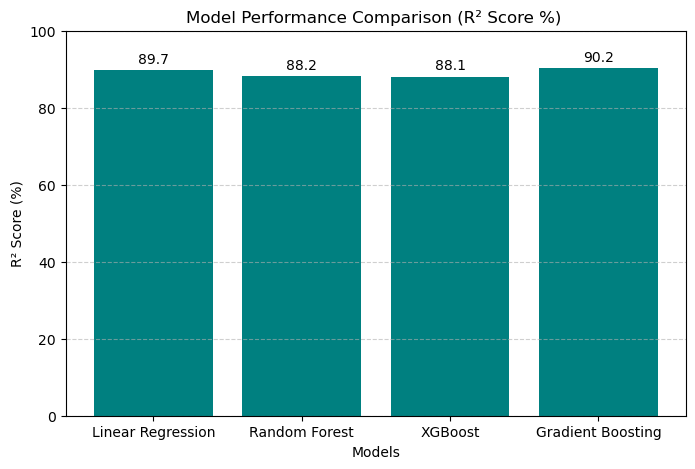

In [92]:
plt.figure(figsize=(8,5))
bars = plt.bar(results.keys(), results.values(), color='teal')

plt.title("Model Performance Comparison (R² Score %) ")
plt.ylabel("R² Score (%)")
plt.xlabel("Models")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10)
plt.show()

### After Hyper Parameter Tuning

In [93]:
models = {
    'Linear Regression': ln,
    'Random Forest': rf,
    'Gradient Boosting': final_pipe,
    'XGBoost': xgb
}

In [94]:
from sklearn.metrics import r2_score

results = {}
for name, model in models.items():
    preds = model.predict(X_test)
    results[name] = r2_score(Y_test, preds) * 100

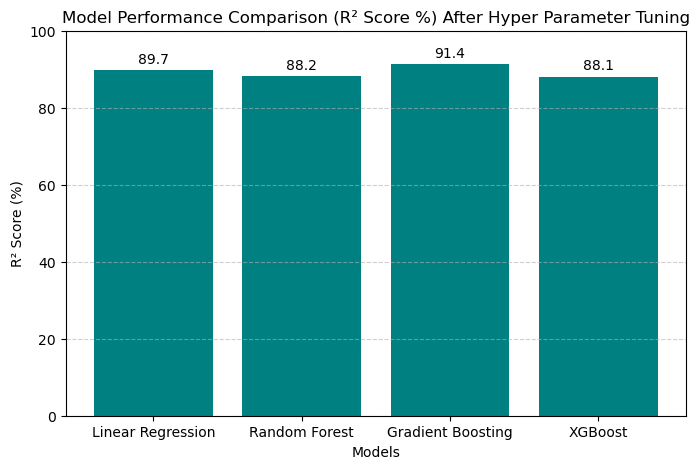

In [95]:
plt.figure(figsize=(8,5))
bars = plt.bar(results.keys(), results.values(), color='teal')

plt.title("Model Performance Comparison (R² Score %) After Hyper Parameter Tuning")
plt.ylabel("R² Score (%)")
plt.xlabel("Models")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()